## Customer Churn Prediction - Vodafone Corporation

### `Business Understanding`

`Introduction:` Vodafone Corporation is the largest pan-European and African telecoms company. They provide mobile and fixed services to over 300 million customers in 17 countries, partner with mobile networks in 45 more and have one of the world’s largest IoT platforms. Vodafone purpose is to connect for a better future by using technology to improve lives, businesses and help progress inclusive sustainable societies.
Vodafone Corporation faces the ubiquitous challenge of customer churn. Churn, the phenomenon where customers discontinue their services with the company, poses significant financial implications and threatens customer satisfaction. To mitigate this challenge and proactively retain valuable customers, Vodafone seeks to implement a Customer Churn Prediction system. This system aims to identify customers at risk of churning based on their behavioral patterns and characteristics, enabling targeted retention strategies.

`Goal`: The goal of this project is to develop a predictive model capable of accurately identifying customers who are likely to churn from Vodafone's services. By leveraging historical customer data encompassing demographics, usage patterns, subscription history, and churn status, the model must forecast the likelihood of churn for individual customers within a specified time frame. The predicted churn probabilities will enable Vodafone to prioritize retention efforts and deploy targeted interventions to retain at-risk customers, thereby reducing churn rates and enhancing overall customer satisfaction.

`Null Hypothesis:`The duration of a customer's tenure with Vodafone exhibits a noticeable relationship with their probability of churning.

`Alternative Hypothesis:`The duration of a customer's tenure with Vodafone does not exhibits a noticeable relationship with their probability of churning.

#### Analytical Questions
1. What are the top 3 features that have strong correlation to churn?
2. Which gender has a higher churn rate?
3. What was the financial impact of customer churn on Vodafone's revenue?
4. What are the prevalent contract types and payment methods among customers exhibiting churn behavior?
5. What percentage of the customers are having tenure greater than 12?



#### Expected Outcomes
* A predictive model capable of accurately forecasting customer churn probabilities.
* Insights into key drivers and factors influencing churn behavior within Vodafone's customer base.
* Enhanced ability to proactively identify at-risk customers and deploy targeted retention strategies to mitigate churn

## `Data Understanding`

`Import Packages`

In [3]:
# Import packages
import numpy as np
import pandas as pd
import os
from dotenv import dotenv_values, find_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import warnings

# remove display limit
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

# hide warnings
warnings.filterwarnings('ignore')

print('Packages imported')


Packages imported


`Extract Datasets`

In [4]:
# Extract datasets from the database
# Load environment variables
environment_variables = dotenv_values(find_dotenv('.env'))

# Get database credentials from .env file
database = environment_variables.get('DATABASE')
server = environment_variables.get('SERVER')
username = environment_variables.get('USERNAME')
password = environment_variables.get('PASSWORD')

# Authenticate connection to the db
conn_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary
conn = pyodbc.connect(conn_string)

print('Succeeded!')

Succeeded!


In [5]:
# Extract the first dataset from the sql server - df1
query = '''
        SELECT *
        FROM dbo.LP2_Telco_churn_first_3000
        '''
df1 = pd.read_sql_query(query, conn)
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [6]:
# Load the second dataset from a github repository - df2
df2 = pd.read_csv('https://github.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/blob/main/LP2_Telco-churn-second-2000.csv?raw=true')
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [7]:
# # load the test dataset
# dftest = pd.read_excel("Data/Telco-churn-last-2000.xlsx")
# dftest.head()

In [8]:
# Combine the datasets - df = df1 + df2
df = pd.concat([df1, df2], ignore_index=True)

`Exploratory Data Analysis`

In [9]:
# Display the head of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [10]:
# Display the tail of the dataset
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
5042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [11]:
# Check the shape of the data
df.shape

(5043, 21)

In [12]:
# Print information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [13]:
# Check for unique values
df.nunique()

customerID          5043
gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4884
Churn                  4
dtype: int64

In [14]:
# Check for missing values
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [15]:
# Check the percentage of the missing data
(df.isnull().sum()/(len(df)))*100

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        5.334127
InternetService      0.000000
OnlineSecurity      12.908983
OnlineBackup        12.908983
DeviceProtection    12.908983
TechSupport         12.908983
StreamingTV         12.908983
StreamingMovies     12.908983
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.099147
Churn                0.019829
dtype: float64

In [16]:
# Check for duplicates
df.duplicated().sum()

0

#### Observations
* There are 5043 observations and 21 features after concatenating the two datasets.
* The first dataset has the True and False inputs, while the second dataset have the Yes and No inputs.
* `TotalCharges` column is of object type instaed of a float.
* Tere are the missing values as follows: 5% in the MultipleLines column, 12% in the `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `Techsupport`, `StreamingMovies`, and `StreamingTV` columns respectively. Additionally, there are missing values of 0.09% and 0.02% in the `TotalCharges` and `Churn` columns respectively.
* There are no duplicated values.
* There are some empty strings in the TotalCharges column.
#### Action
* Replace True with Yes and False with No and No internet service with No.
* Drop the missing values of `TotalCharges` and `Churn` since the percentange is small and filling them could affect our result.
* Change the `TotalCharges` to float type.
* Fill in the missing values of the other columns.
* Drop the rows with the empty strings.
* Drop the CustomerID column because it's not relevant to our analysis

In [17]:
# Replace True with Yes and False with No
bools_cols = df.columns[df.dtypes == 'object']
df[bools_cols] = df[bools_cols].replace({True: 'Yes', False: 'No'})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [18]:
# Drop the missing values of TotalCharges and Churn
df = df.dropna(subset=['TotalCharges', 'Churn'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5037 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5037 non-null   object 
 1   gender            5037 non-null   object 
 2   SeniorCitizen     5037 non-null   int64  
 3   Partner           5037 non-null   object 
 4   Dependents        5037 non-null   object 
 5   tenure            5037 non-null   int64  
 6   PhoneService      5037 non-null   object 
 7   MultipleLines     4770 non-null   object 
 8   InternetService   5037 non-null   object 
 9   OnlineSecurity    4388 non-null   object 
 10  OnlineBackup      4388 non-null   object 
 11  DeviceProtection  4388 non-null   object 
 12  TechSupport       4388 non-null   object 
 13  StreamingTV       4388 non-null   object 
 14  StreamingMovies   4388 non-null   object 
 15  Contract          5037 non-null   object 
 16  PaperlessBilling  5037 non-null   object 
 17  

In [20]:
# Remove the empty strings in the TotalCharges column
df = df[df['TotalCharges'] != ' ']

In [ ]:
Drop the

In [21]:
# change TotalCharges to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5034 non-null   object 
 1   gender            5034 non-null   object 
 2   SeniorCitizen     5034 non-null   int64  
 3   Partner           5034 non-null   object 
 4   Dependents        5034 non-null   object 
 5   tenure            5034 non-null   int64  
 6   PhoneService      5034 non-null   object 
 7   MultipleLines     4767 non-null   object 
 8   InternetService   5034 non-null   object 
 9   OnlineSecurity    4385 non-null   object 
 10  OnlineBackup      4385 non-null   object 
 11  DeviceProtection  4385 non-null   object 
 12  TechSupport       4385 non-null   object 
 13  StreamingTV       4385 non-null   object 
 14  StreamingMovies   4385 non-null   object 
 15  Contract          5034 non-null   object 
 16  PaperlessBilling  5034 non-null   object 
 17  

In [22]:
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       267
InternetService       0
OnlineSecurity      649
OnlineBackup        649
DeviceProtection    649
TechSupport         649
StreamingTV         649
StreamingMovies     649
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [23]:
# Filling in missing values - OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies.
# Define a function to fill missing values
def fill_missing(row):
    if row['InternetService'] == 'No':
        return 'No internet service'
    else:
        return 'No' if pd.isnull(row['OnlineSecurity']) else 'Yes'
# Apply function to each row
df['OnlineSecurity'] = df.apply(fill_missing, axis=1)
df['OnlineBackup'] = df.apply(fill_missing, axis=1)
df['DeviceProtection'] = df.apply(fill_missing, axis=1)
df['TechSupport'] = df.apply(fill_missing, axis=1)
df['StreamingTV'] = df.apply(fill_missing, axis=1)
df['StreamingMovies'] = df.apply(fill_missing, axis=1)

In [24]:
# Filling in the missing values of MutipleLines
df['MultipleLines'] = df.apply(lambda row: 'No phone service' if row['PhoneService'] == 'No' and pd.isnull(row['MultipleLines']) else row['MultipleLines'], axis=1)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
# Descriptive Statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5034.000000,5034.000000,5034.000000,5034.000000
mean,0.162694,32.620580,65.107251,2300.954758
std,0.369123,24.511015,30.068019,2268.346402
min,0.000000,1.000000,18.400000,18.799999
25%,0.000000,9.000000,35.799999,417.662498
50%,0.000000,29.000000,70.599998,1401.000000
75%,0.000000,56.000000,90.050003,3860.599976
max,1.000000,72.000000,118.650002,8670.100000


In [29]:
# Descriptive statistics with including the categorical columns
df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034
unique,5034,2,2,2,2,3,3,2,2,2,2,2,2,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,No
freq,1,2554,2583,3481,4547,2421,2247,3957,3957,3957,3957,3957,3957,2744,2992,1699,3698


`Insights:`

From the above descriptive stats we can extract the following;
* Approximately 16.27% of the observations in the dataset are senior citizens. The standard deviation shows the variability in this proportion across the dataset.
* On average, customers have been with the service for around 32.62 months. The standard deviation indicates considerable variability in tenure among customers, with some having short tenures and others much longer.
* The average monthly charge for customers is $65.11. The standard deviation indicates the variability in monthly charges among customers, suggesting that there might be different pricing plans or factors influencing charges.
* The average total charges incurred by customers are $2300.95. The large standard deviation suggests significant variability in the total charges, indicating differences in usage patterns or billing arrangements among customers. The mean is larger than the median, suggesting a potential right skew (positive skewness).

`Univariate Analysis`

Seperate numerical and categorical columns for easy analysis

In [32]:
# Seperate numerical and categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

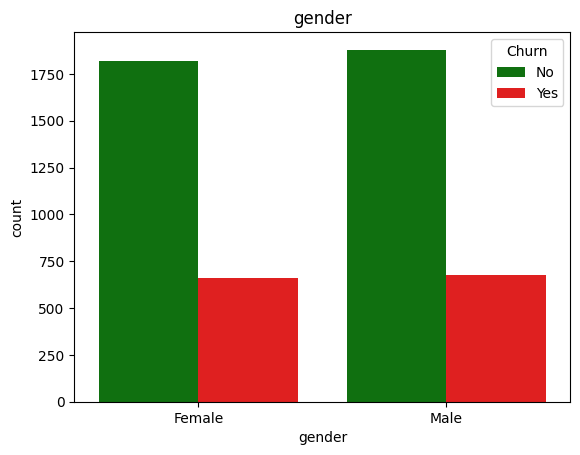

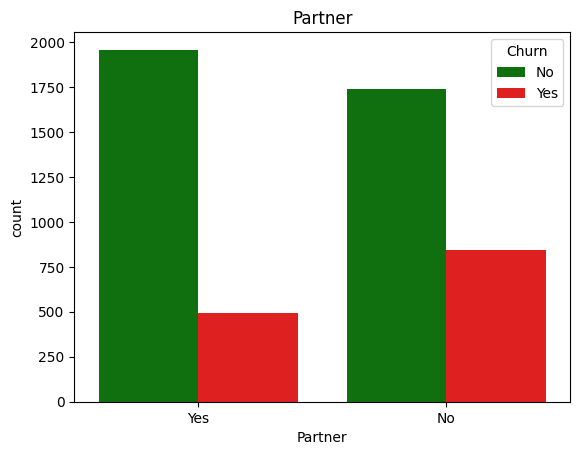

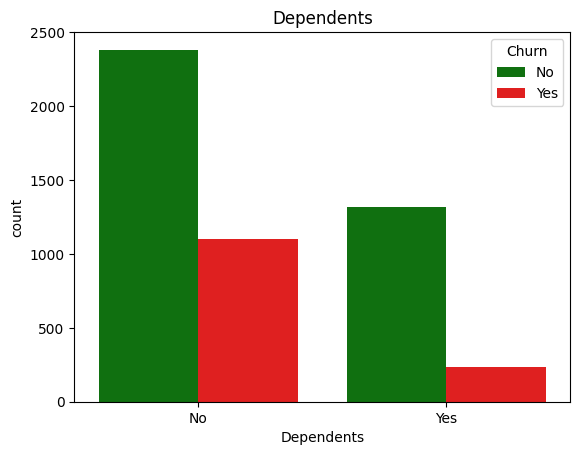

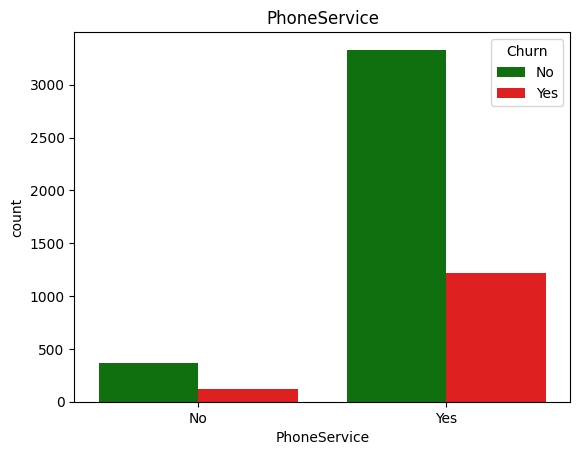

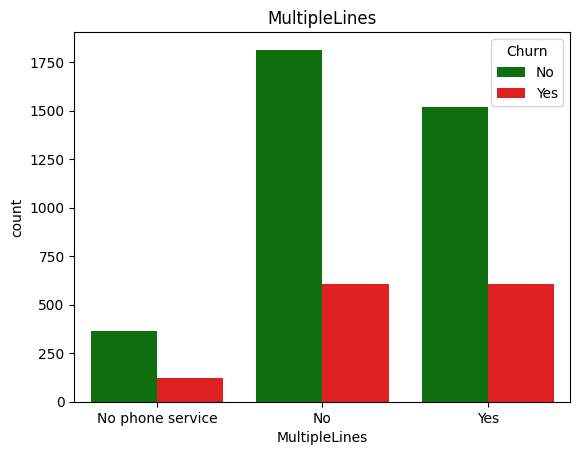

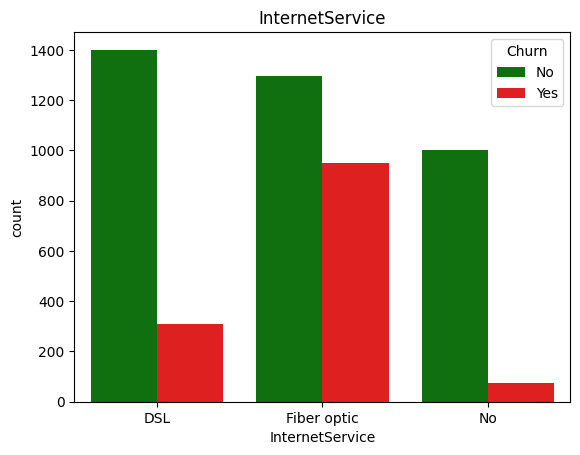

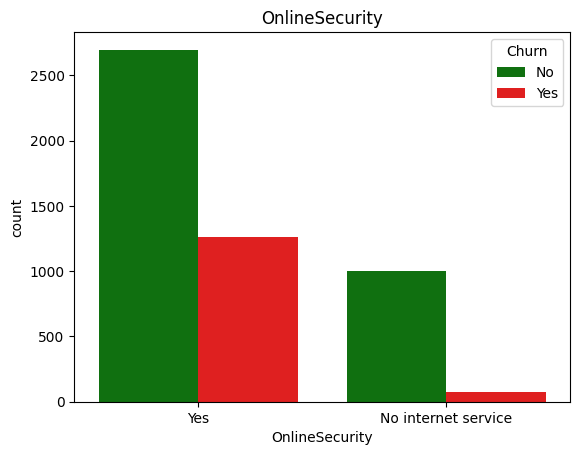

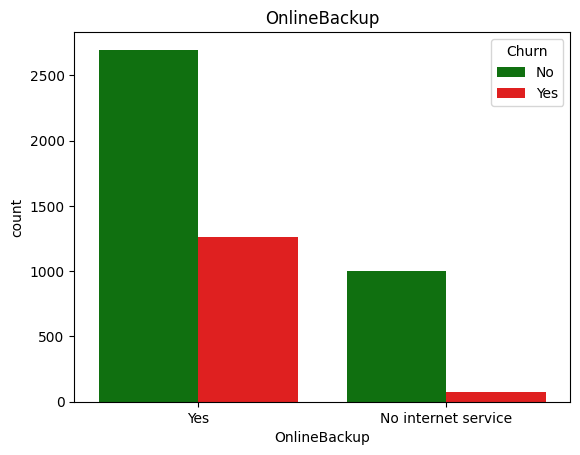

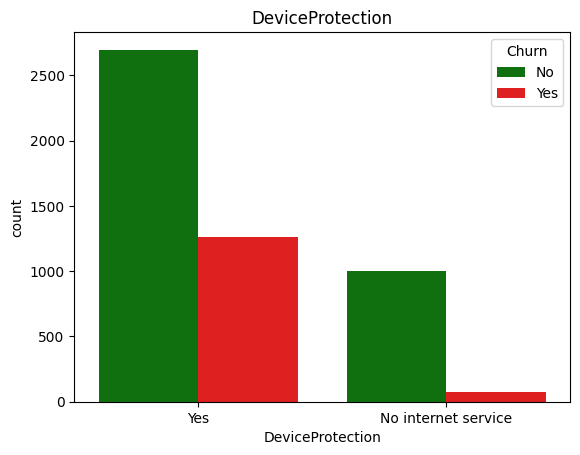

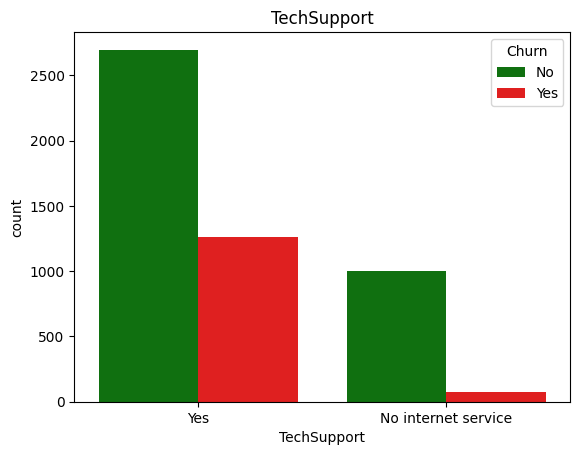

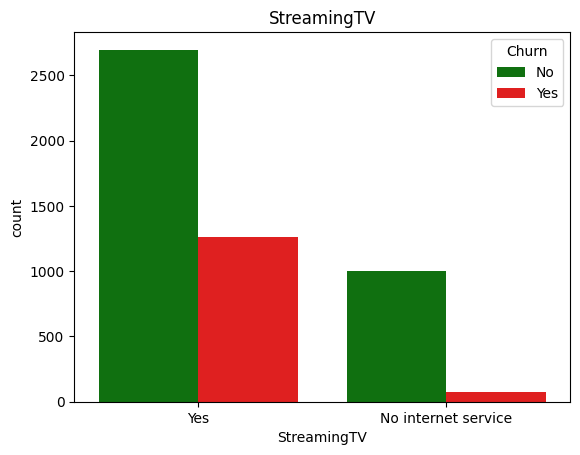

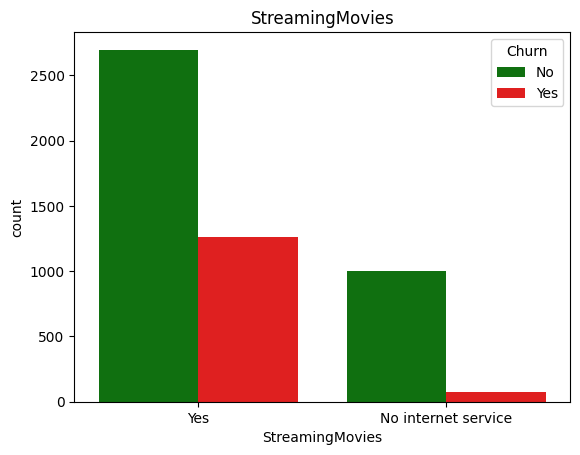

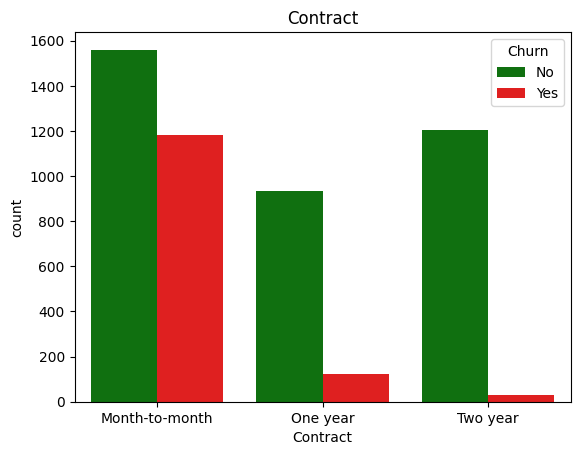

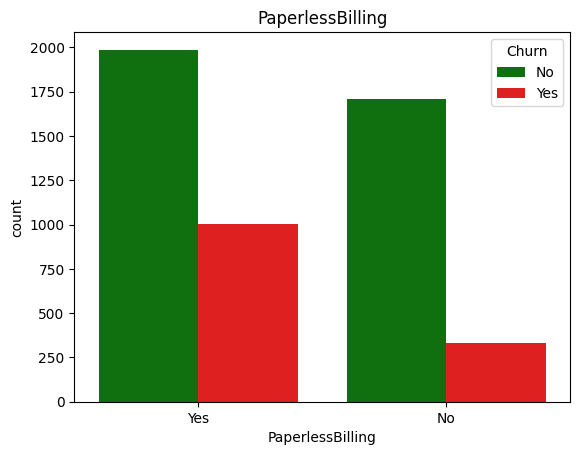

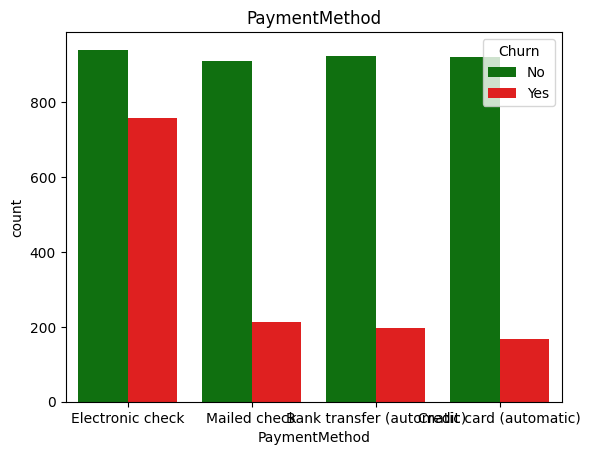

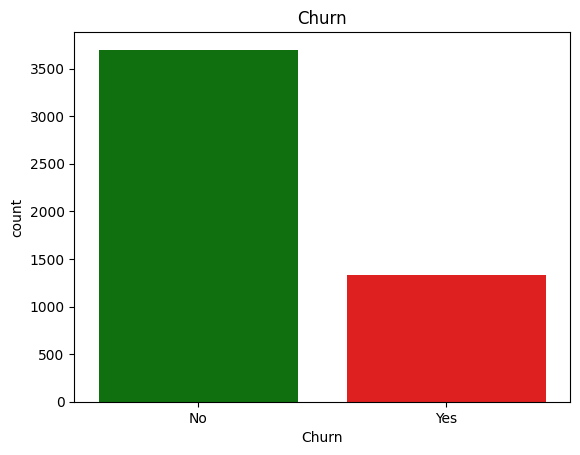

In [78]:
# Display countplot for all the categorical columns
colors = ['green', 'red']
for col in cat_cols:
    if col not in ['customerID']:
        sns.countplot(x=col, data=df, hue='Churn', palette=colors).set_title(col)
        plt.show()

In [58]:
df.Churn.value_counts()

Churn
No     3698
Yes    1336
Name: count, dtype: int64


* The visualization clearly indicates that 3698 customers have chosen to continue their service, while 1869 customers have decided to terminate their subscription.
* Notably, there appears to be a considerable churn rate among customers utilizing the electronic check payment method.
* Customers who opted for paperless billing exhibit a higher churn rate compared to other billing methods.
* The month-to-month contract type demonstrates a notably elevated churn rate among customers.
* A substantial proportion of customers who subscribed to the Fiber internet service exhibit churn behavior.

SeniorCitizen
Skew : 1.83


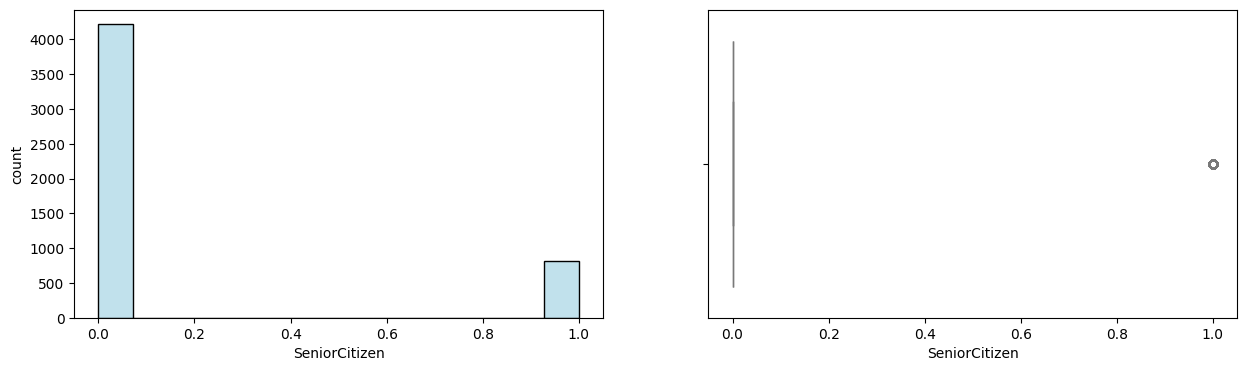

tenure
Skew : 0.22


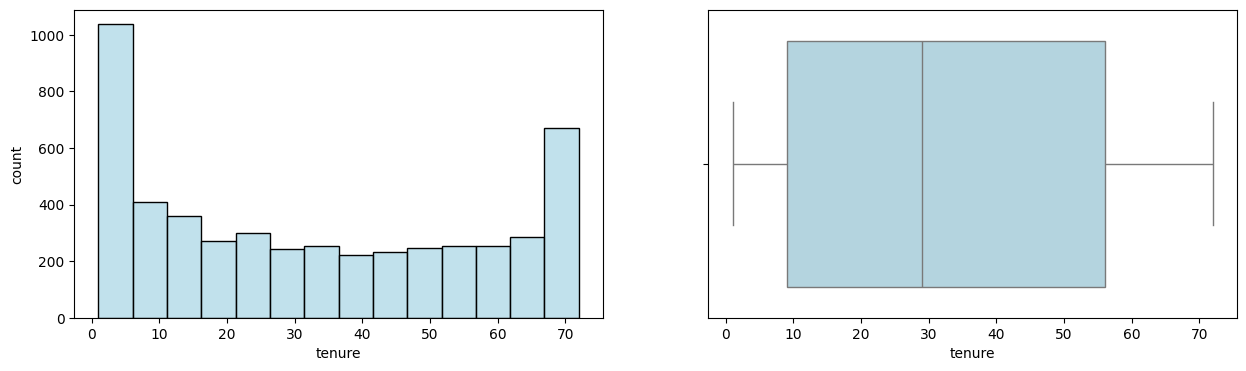

MonthlyCharges
Skew : -0.24


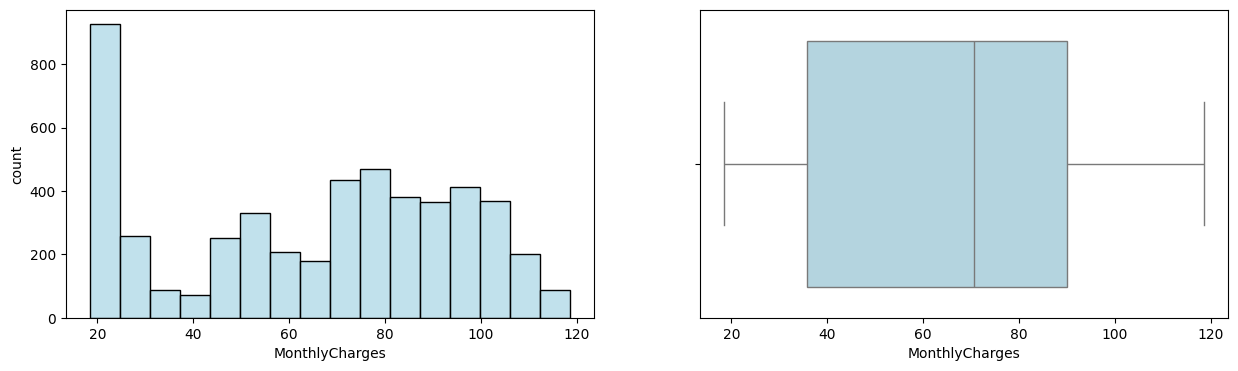

TotalCharges
Skew : 0.94


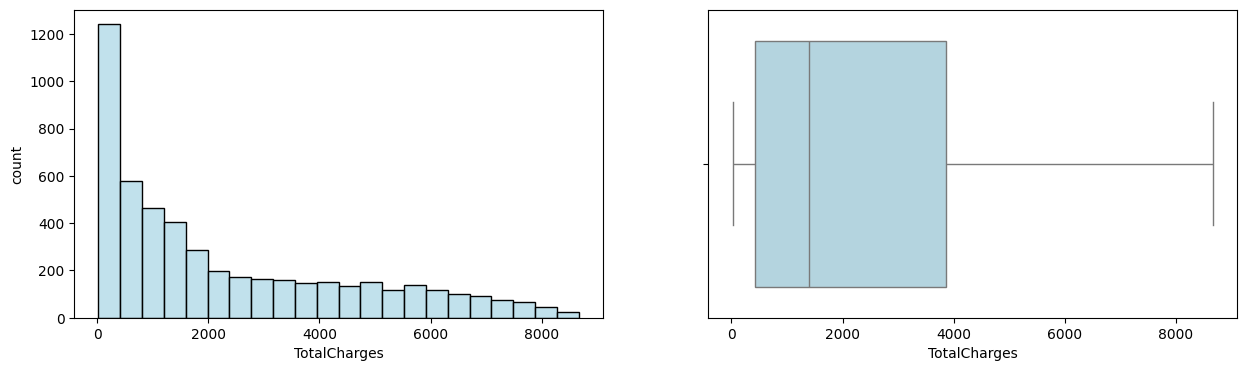

In [74]:
# Display histogram and boxplot for all the numerical columns
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(x= df[col], color='lightblue')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightblue')
    plt.show()

`Bivariate Analysis`

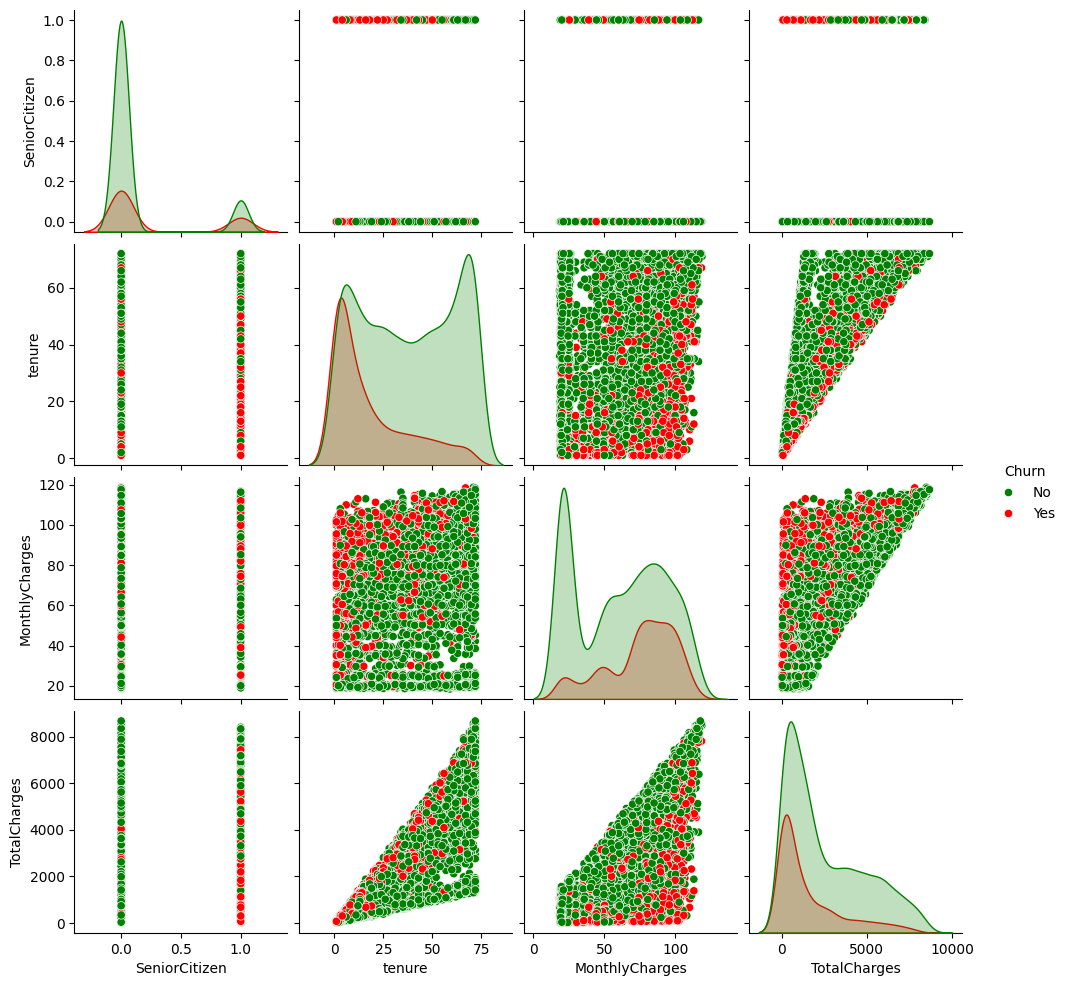

In [82]:
sns.pairplot(df, hue='Churn', palette=colors);

In [88]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

ValueError: could not convert string to float: 'Female'

<Figure size 1200x700 with 0 Axes>

The Pairplot provides the insight below;
* `TotalCharges` has strong correlation with `tenure` and `MonthlyCharges`.
* `MonthlyCharges` has slight correlation with `tenure`.



`Multivariate Analysis`